<a href="https://colab.research.google.com/github/rishikaranjan/LoanApproval/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import numpy as np
import sklearn
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [3]:
data = pd.read_csv("LoanData.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002534,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**Data Cleaning**

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [10]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())


In [11]:
data.isnull().sum().sum()

0

**Remove Outliers**

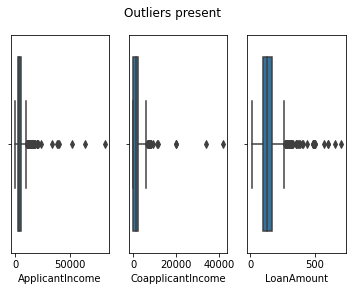

In [12]:
plt.subplot(1,3,1)
sns.boxplot(x = data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(x = data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(x = data['LoanAmount'])

plt.suptitle('Outliers present')
plt.show()

In [13]:
print(data.shape)
data = data[data['ApplicantIncome'] < 20000]
print(data.shape)

(614, 13)
(602, 13)


In [14]:
print(data.shape)
data = data[data['CoapplicantIncome'] < 10000]
print(data.shape)

(602, 13)
(596, 13)


In [15]:
print(data.shape)
data = data[data['LoanAmount'] < 400]
print(data.shape)

(596, 13)
(588, 13)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



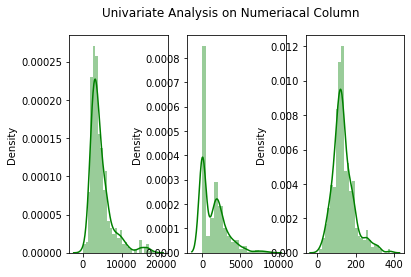

In [16]:
# plt.rcParams['figure.figsize'] = (18 , 4)
plt.subplot(1,3,1)
sns.distplot(x = data['ApplicantIncome'] , color = 'green')

plt.subplot(1,3,2)
sns.distplot(x = data['CoapplicantIncome'] , color = 'green')

plt.subplot(1,3,3)
sns.distplot(x = data['LoanAmount'] , color = 'green')

plt.suptitle('Univariate Analysis on Numeriacal Column')
plt.show()

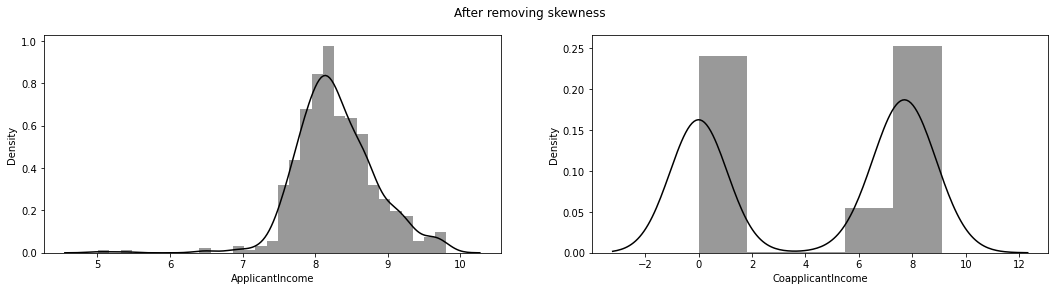

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18 , 4)

data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'] , color = 'black')

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'] , color = 'black')

plt.suptitle('After removing skewness')
plt.show()

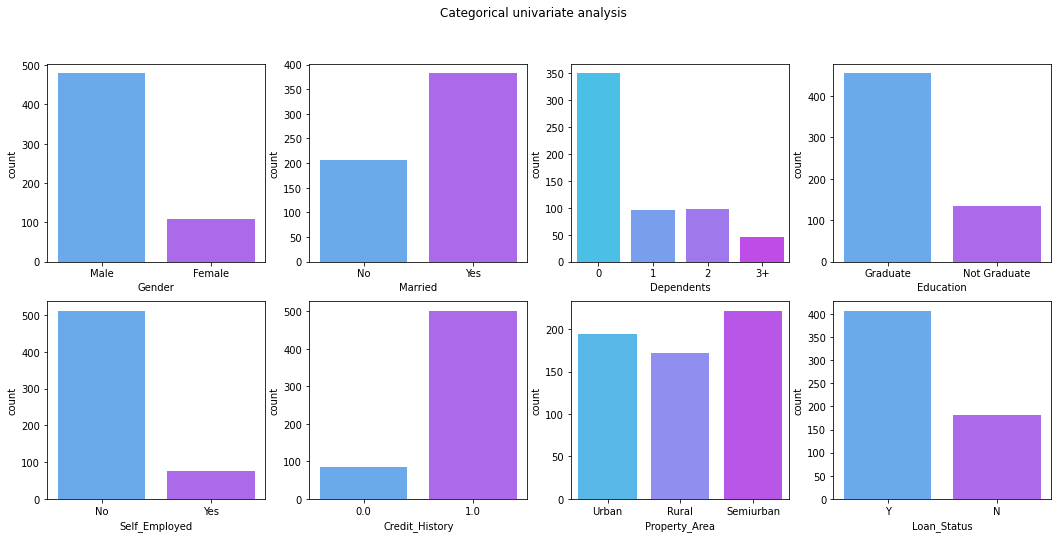

In [18]:
plt.rcParams['figure.figsize'] = (18 , 8)

plt.subplot(2, 4, 1)
sns.countplot(data['Gender'] , palette = 'cool')

plt.subplot(2,4,2)
sns.countplot(data['Married'] , palette = 'cool')

plt.subplot(2,4,3)
sns.countplot(data['Dependents'] , palette = 'cool')

plt.subplot(2,4,4)
sns.countplot(data['Education'] , palette = 'cool')

plt.subplot(2,4,5)
sns.countplot(data['Self_Employed'] , palette = 'cool')

plt.subplot(2,4,6)
sns.countplot(data['Credit_History'] , palette = 'cool')

plt.subplot(2,4,7)
sns.countplot(data['Property_Area'] , palette = 'cool')

plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'] , palette = 'cool')

plt.suptitle('Categorical univariate analysis')
plt.show()

**Univariate Analysis**

**Bivariate Analysis**

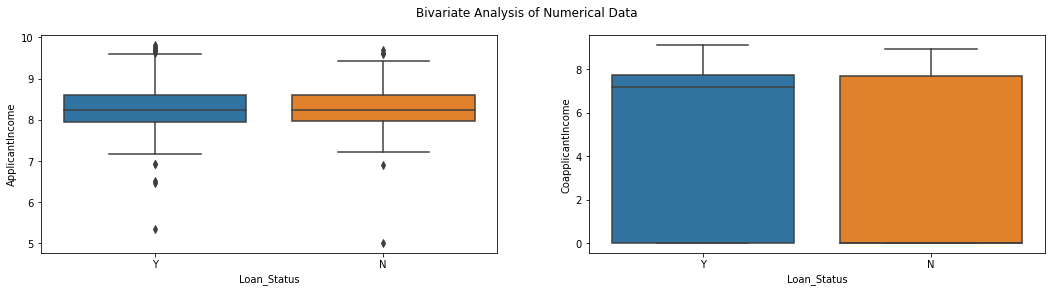

In [19]:

plt.rcParams['figure.figsize'] = (18 , 4)


plt.subplot(1,2,1)
sns.boxplot(data['Loan_Status'] , data['ApplicantIncome'])

plt.subplot(1,2,2)
sns.boxplot(data['Loan_Status'] ,data['CoapplicantIncome'])

plt.suptitle('Bivariate Analysis of Numerical Data')
plt.show()

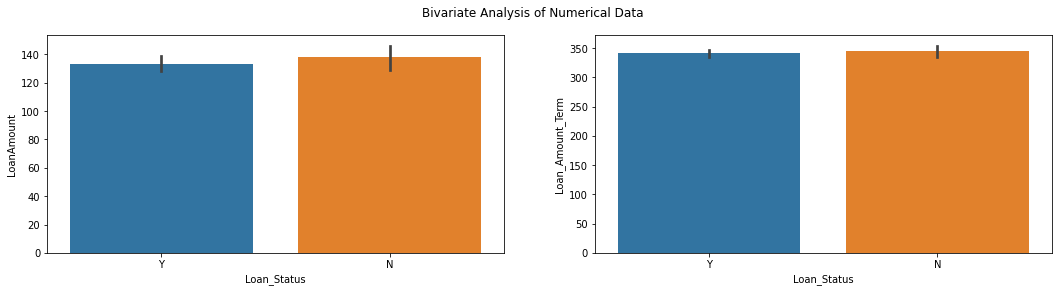

In [20]:

plt.rcParams['figure.figsize'] = (18 , 4)


plt.subplot(1,2,1)
sns.barplot(data['Loan_Status'] , data['LoanAmount'])

plt.subplot(1,2,2)
sns.barplot(data['Loan_Status'] ,data['Loan_Amount_Term'])

plt.suptitle('Bivariate Analysis of Numerical Data')
plt.show()

In [21]:
# categorical vs cattegorical

print("Impact of Gender on Loan Approval")
print(pd.crosstab(data['Loan_Status'] , data['Gender']))
print('\n')

print("Impact of Marriage on Loan Approval")
print(pd.crosstab(data['Loan_Status'] , data['Married']))
print('\n')

print("Impact of Dependents on Loan Approval")
print(pd.crosstab(data['Loan_Status'] , data['Dependents']))
print('\n')

print("Impact of Education on Loan Approval")
print(pd.crosstab(data['Loan_Status'] , data['Education']))
print('\n')

print("Impact of Employment on Loan Approval")
print(pd.crosstab(data['Loan_Status'] , data['Self_Employed']))
print('\n')

print("Impact of Area on Loan Approval")
print(pd.crosstab(data['Loan_Status'] , data['Property_Area']))


Impact of Gender on Loan Approval
Gender       Female  Male
Loan_Status              
N                36   145
Y                73   334


Impact of Marriage on Loan Approval
Married       No  Yes
Loan_Status          
N             76  105
Y            130  277


Impact of Dependents on Loan Approval
Dependents     0   1   2  3+
Loan_Status                 
N            109  33  24  15
Y            240  63  74  30


Impact of Education on Loan Approval
Education    Graduate  Not Graduate
Loan_Status                        
N                 129            52
Y                 325            82


Impact of Employment on Loan Approval
Self_Employed   No  Yes
Loan_Status            
N              156   25
Y              356   51


Impact of Area on Loan Approval
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 65         51     65
Y                107        171    129


In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [23]:
data = data.drop('Loan_ID' , axis = 1)

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [25]:
data['Gender'] = data['Gender'].replace(('Male' , 'Female') , (1,0))
data['Married'] = data['Married'].replace(('Yes' , 'No') , (1,0))
data['Dependents'] = data['Dependents'].replace(('0' , '1' , '2' , '3+') , (1,0 ,0 ,0))
data['Education'] = data['Education'].replace(('Graduate' , 'Not Graduate') , (1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes' , 'No') , (1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban' , 'Semiurban' , 'Rural') , (1 , 1 , 0))

In [26]:
y = data['Loan_Status']

x = data.drop(['Loan_Status'] , axis = 1)

Resampling

In [27]:
from imblearn.over_sampling import SMOTE

x_resample,y_resample = SMOTE().fit_sample(x , y.values.ravel())

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(x_resample , y_resample , test_size = 0.2 , random_state = 0)

**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = model.predict(x_test)

print("Training Accuracy" , model.score(x_train , y_train))
print("Testing Accuracy" , model.score(x_test , y_test))

Training Accuracy 0.7542242703533026
Testing Accuracy 0.7668711656441718


**Gradient Boosting**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train , y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
y_pred = model.predict(x_test)

print("Training Accuracy" , model.score(x_train , y_train))
print("Testing Accuracy" , model.score(x_test , y_test))

Training Accuracy 0.9216589861751152
Testing Accuracy 0.8220858895705522
